<a href="https://colab.research.google.com/github/mc-ivan/2023-2-CO-Modulo-2/blob/master/notebooks/Ejercicio_Grupal_en_Clases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio en clase
### Integrantes:
- Yamile Calderon
- Ruben Baltazar B.
- Never Adrian
- Luis Alberto Martinez
- Ivan Mamani

## 1. Datos: Informe Mundial de la Felicidad de 2019 World Happiness Report en Kaggle

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 1. Cargar datos
url = "https://raw.githubusercontent.com/mc-ivan/graficos-matplot/main/dataset/2019.csv"

# Leer CSV directamente desde GitHub
df = pd.read_csv(url)

df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## 2.  Gráficos
### 2.1. Gráfico de barras (Top 10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

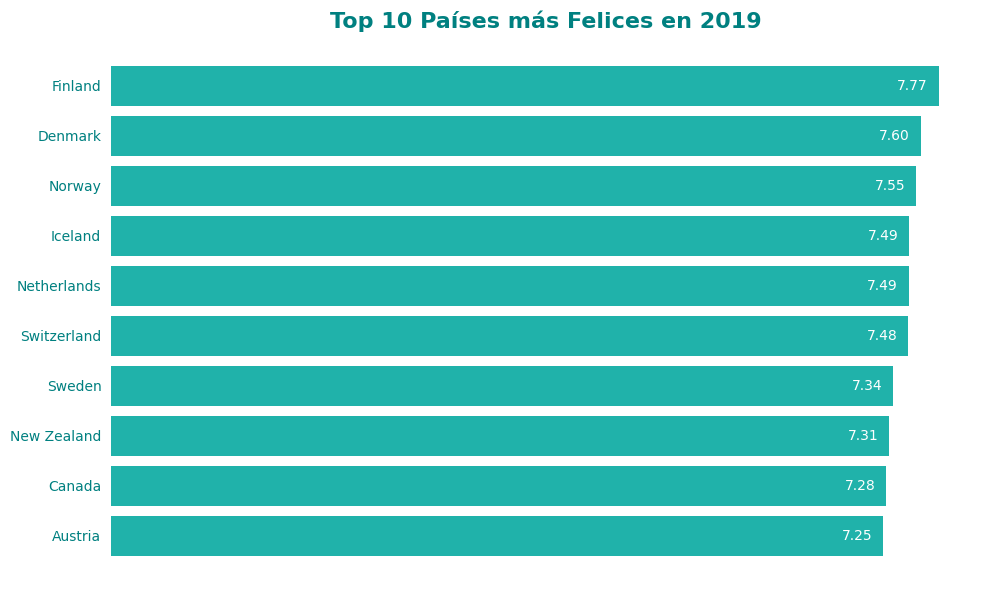

In [ ]:
# ===============================
# 2.1. GRÁFICO DE BARRAS HORIZONTALES - TOP 10 PAÍSES MÁS FELICES
# ===============================
top10 = df.nlargest(10, "Score")

plt.figure(figsize=(10, 6))

# Quitar marcas y texto del eje Y, pero mostrar etiquetas eje X
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)

# Quitar los bordes del gráfico
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.barh(top10["Country or region"], top10["Score"], color="#20B2AA")

plt.title(
    "Top 10 Países más Felices en 2019",
    fontsize=16,         # tamaño de letra
    fontweight="bold",   # negrita
    color="#008080",     # teal
    pad=10               # espacio extra arriba
)
plt.yticks(color='#008080')

plt.gca().invert_yaxis()  # Para que el más feliz esté arriba
for i, v in enumerate(top10["Score"]):
    plt.text(v - 0.1, i, f"{v:.2f}", color="white", va="center", ha="right", fontsize=10)
plt.tight_layout()

plt.savefig("top10_paises_felices.png", dpi=300)
# files.download('top10_paises_felices.png')

plt.show()

### Observando el gráfico de barras (Top 10):

**¿Qué patrón geográfico o regional observan en la lista de los países más felices?**

Se observa un predominio claro de países nórdicos y europeos (Finlandia, Dinamarca, Noruega, Islandia, Países Bajos, Suiza, Suecia, Austria) entre los más felices. También aparecen países anglófonos desarrollados (Nueva Zelanda, Canadá). Esto indica que la felicidad tiende a ser más alta en regiones con economías desarrolladas y sistemas sociales sólidos.

**¿Qué sugiere esto sobre los factores no medidos que podrían influir en la felicidad?**

Más allá del PIB, parece que factores como la estabilidad política, la confianza en instituciones, la igualdad social, servicios públicos de calidad, bienestar comunitario y calidad de vida influyen mucho en la felicidad.

### 2.2. Histograma (Distribución de la felicidad)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

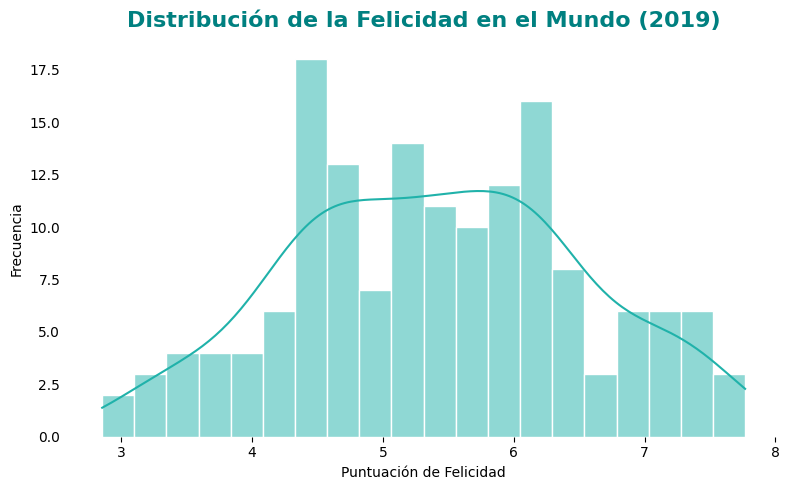

In [ ]:
# ===============================
# 2.2. HISTOGRAMA - DISTRIBUCIÓN DE LA FELICIDAD
# ===============================
plt.figure(figsize=(8, 5))
# Quitar marcas y texto del eje Y, pero mostrar etiquetas eje X
plt.tick_params(top=False, bottom=True, left=False, right=False, labelleft=True, labelbottom=True)

# Quitar los bordes del gráfico
for spine in plt.gca().spines.values():
    spine.set_visible(False)
sns.histplot(df['Score'], bins=20, kde=True, color='#20B2AA', edgecolor="white")

plt.title(
    "Distribución de la Felicidad en el Mundo (2019)",
    fontsize=16,         # tamaño de letra
    fontweight="bold",   # negrita
    color="#008080",     # teal
    pad=10               # espacio extra arriba
)
plt.xlabel('Puntuación de Felicidad')
plt.ylabel('Frecuencia')
plt.tight_layout()

plt.savefig("hist_distribucion_felicidad.png", dpi=300)
# files.download('hist_distribucion_felicidad.png')

plt.show()

### Analizando el histograma (Distribución de la felicidad):

**¿Cómo describirías la forma de la distribución?**

La distribución es aproximadamente unimodal y simétrica, con un pico alrededor de 5 a 6 puntos. Esto indica que la mayoría de los países tienen una puntuación de felicidad media, con menos países en los extremos de muy alta o muy baja felicidad.

**¿La mayoría de los países se agrupan en torno a un valor central, o hay muchos países en los extremos?**

Se agrupan mayormente alrededor de un valor central (5-6), con pocos países en los extremos. Hay algunas desviaciones hacia felicidad muy baja y alta, pero no son mayoría.

**¿Cómo calificarías la felicidad mundial?**

La felicidad mundial puede calificarse como "generalmente media" o "moderadamente alta", porque la mayoría de países se encuentran en esa zona central del histograma, sin mucha polarización.

### 2.3. Dispersión (PIB vs Felicidad)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

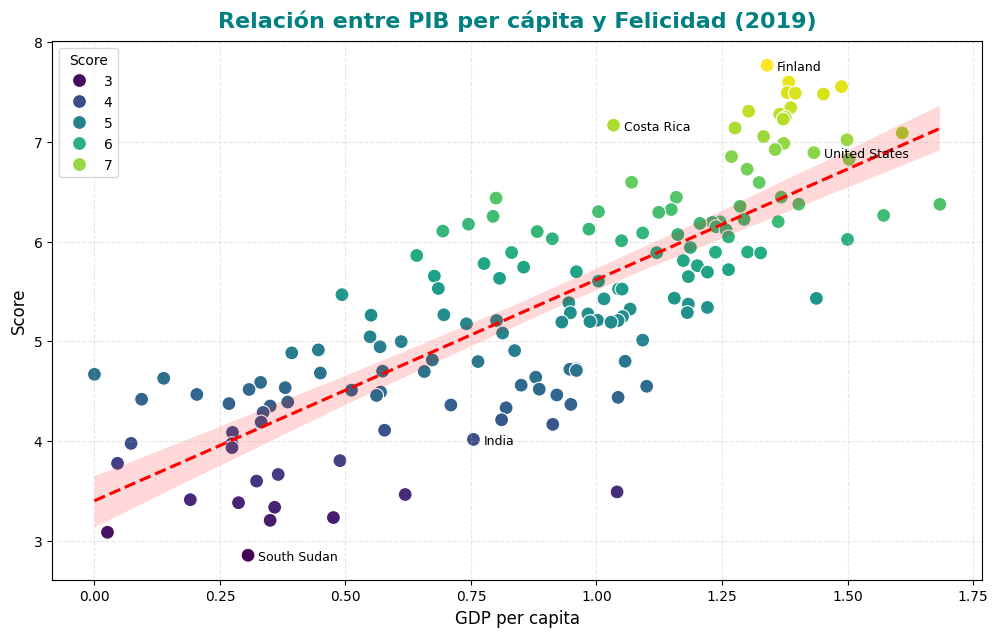

In [84]:
# ===============================
# 2.3. DISPERSIÓN - PIB vs FELICIDAD
# ===============================
# Configurar el gráfico de dispersión con mappable para la barra de color
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(data=df, x='GDP per capita', y='Score',
                         hue='Score', palette='viridis', s=100)

# plt.title('Relación entre PIB per cápita y Felicidad (2019)', fontsize=16, pad=20)
plt.title(
    "Relación entre PIB per cápita y Felicidad (2019)",
    fontsize=16,         # tamaño de letra
    fontweight="bold",   # negrita
    color="#008080",     # teal
    pad=10               # espacio extra arriba
)
plt.xlabel('PIB per cápita', fontsize=12)
plt.ylabel('Puntuación de Felicidad', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Línea de tendencia
sns.regplot(data=df, x='GDP per capita', y='Score',
           scatter=False, color='red', line_kws={'linestyle':'--'})

# Destacar países
highlight_countries = ['Finland', 'Costa Rica', 'United States', 'India', 'South Sudan']
for _, row in df[df['Country or region'].isin(highlight_countries)].iterrows():
    plt.text(row['GDP per capita']+0.02, row['Score']-0.05,
             row['Country or region'], fontsize=9)

# Añadir barra de color CORREGIDO
norm = plt.Normalize(df['Score'].min(), df['Score'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

plt.savefig('pib_vs_felicidad.png', bbox_inches='tight', dpi=300)
# files.download('pib_vs_felicidad.png')

plt.show()

### Interpretando el gráfico de dispersión (PIB vs. Felicidad):

**Describe la relación entre PIB per cápita y felicidad:**

Existe una relación positiva clara: a mayor PIB per cápita, mayor puntuación de felicidad. Sin embargo, la relación no es perfectamente lineal.

**¿Es fuerte o débil?**

La relación parece moderadamente fuerte, pero con bastante dispersión.

**¿La relación parece lineal?**

No es perfectamente lineal; parece que el aumento en felicidad es mayor al principio conforme sube el PIB, y luego la felicidad se estabiliza (rendimientos decrecientes).

**¿Hay excepciones a la regla?**

Sí, algunos países con PIB bajo (como Costa Rica) tienen puntuaciones de felicidad relativamente altas, indicando que otros factores influyen en la felicidad más allá del dinero. También hay países con alto PIB y felicidad menor a la esperada.

## 4. Conclusión General (Insight Principal):

El nivel de felicidad mundial en 2019 está fuertemente correlacionado con el desarrollo económico, pero no depende exclusivamente del PIB per cápita. Los países más felices se concentran en regiones con economías desarrolladas y sistemas sociales sólidos, donde la calidad de vida, confianza social y estabilidad política juegan un papel fundamental. La mayoría de los países tienen una felicidad moderada, y aunque el dinero mejora la felicidad, existen claras excepciones donde factores sociales y culturales son determinantes. Así, la felicidad global refleja un balance entre bienestar material y factores intangibles de calidad de vida.